<a href="https://colab.research.google.com/github/ivnizhnik/KaggleHousePrices_AdvancedRegressionTechniques/blob/main/KaggleHousePriceIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df='/content/drive/MyDrive/KaggleHousePrices/train.csv'
df=pd.read_csv(df)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

The train dataset consists of 81 features and 1460 samples/rows (numerical as well object) 

In [ ]:
# Deleting irrelevant features: The Id feature seems irrelevant here. From a quick dataset observation, this is the first step to apply.
del df['Id']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**Target Feature:** 
- The SalePrice is the target feature. It is a continuous numerical variable with zero missing values. 


In [ ]:
# Checking for missing values 
print(df.isna().sum().sum(), 'missing values')

6965 missing values


In [ ]:
df.isna().sum()
# df.isnull().sum() or df.isnull().sum().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
# Deleting features with most missing values. Rule of thumb - delete features with more than 5% missing values. 
# Here Alley 91 non-null or ~ 6%; PoolQC 7 non-null or ~ 0.47%; MiscFeature 54 non-null or ~3.69
df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1,inplace=True)

In [ ]:
# Checking for missing values 
print(df.isna().sum().sum(), 'missing values')

2737 missing values


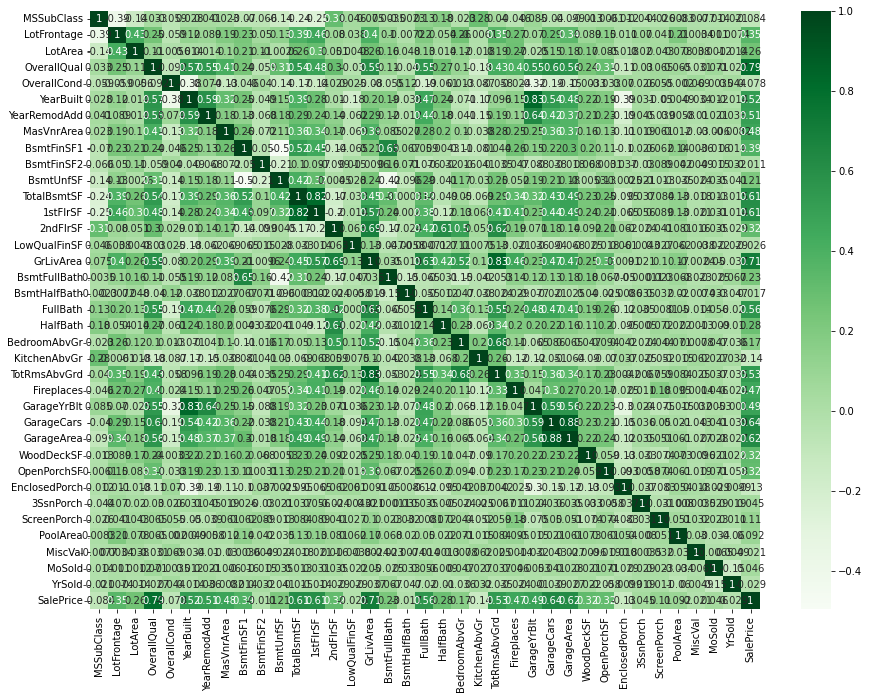

In [ ]:
# Correlation 
fig, ax = plt.subplots(figsize=(15,11)) 
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

**Select Columns**
- number vs object

In [ ]:
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

In [ ]:
# Select columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
num_columns = num_selector(df)
cat_columns = cat_selector(df)

In [ ]:
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical columns are ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

In [ ]:
df['LotArea'].value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

In [ ]:
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Q1 = df[cols].quantile(0.02)
Q3 = df[cols].quantile(0.98)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.shape

(1389, 77)

**Analyzing categorical features**

In [ ]:
df['MSZoning'].value_counts()

RL         1097
RM          206
FV           62
RH           15
C (all)       9
Name: MSZoning, dtype: int64

In [ ]:
df['Street'].value_counts()

Pave    1384
Grvl       5
Name: Street, dtype: int64

In [ ]:
df['LotShape'].value_counts()

Reg    885
IR1    461
IR2     35
IR3      8
Name: LotShape, dtype: int64

In [ ]:
df['LandContour'].value_counts()

Lvl    1258
Bnk      56
HLS      45
Low      30
Name: LandContour, dtype: int64

In [ ]:
df['Utilities'].value_counts()

AllPub    1388
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
df['LotConfig'].value_counts()

Inside     1005
Corner      249
CulDSac      86
FR2          45
FR3           4
Name: LotConfig, dtype: int64

In [ ]:
df['LandSlope'].value_counts()

Gtl    1321
Mod      60
Sev       8
Name: LandSlope, dtype: int64

In [ ]:
df['Neighborhood'].value_counts()

NAmes      214
CollgCr    147
OldTown    106
Edwards     96
Somerst     83
NridgHt     76
Gilbert     74
Sawyer      73
NWAmes      69
SawyerW     57
BrkSide     55
Mitchel     46
Crawfor     46
NoRidge     40
Timber      36
IDOTRR      33
StoneBr     24
ClearCr     23
SWISU       19
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
df['Condition1'].value_counts()

Norm      1208
Feedr       74
Artery      44
RRAn        23
PosN        17
RRAe        11
PosA         7
RRNn         4
RRNe         1
Name: Condition1, dtype: int64

In [ ]:
df['Condition2'].value_counts()

Norm      1377
Feedr        4
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [ ]:
df['BldgType'].value_counts()

1Fam      1160
TwnhsE     110
Duplex      50
Twnhs       42
2fmCon      27
Name: BldgType, dtype: int64

In [ ]:
df['HouseStyle'].value_counts()

1Story    700
2Story    429
1.5Fin    136
SLvl       61
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      1
Name: HouseStyle, dtype: int64

In [ ]:
df['RoofStyle'].value_counts()

Gable      1092
Hip         268
Gambrel      11
Flat         10
Mansard       7
Shed          1
Name: RoofStyle, dtype: int64

In [ ]:
df['RoofMatl'].value_counts()

CompShg    1369
Tar&Grv       9
WdShake       5
WdShngl       4
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [ ]:
df['Exterior1st'].value_counts()

VinylSd    501
HdBoard    214
MetalSd    208
Wd Sdng    190
Plywood     95
CemntBd     59
BrkFace     46
WdShing     26
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [ ]:
df['Exterior2nd'].value_counts()

VinylSd    491
MetalSd    202
HdBoard    198
Wd Sdng    184
Plywood    126
CmentBd     58
Wd Shng     37
Stucco      24
BrkFace     23
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [ ]:
df['MasVnrType'].value_counts()

None       814
BrkFace    430
Stone      124
BrkCmn      13
Name: MasVnrType, dtype: int64

In [ ]:
df['ExterQual'].value_counts()

TA    864
Gd    466
Ex     48
Fa     11
Name: ExterQual, dtype: int64

In [ ]:
df['ExterCond'].value_counts()

TA    1225
Gd     136
Fa      24
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [ ]:
df['Foundation'].value_counts()

PConc     625
CBlock    599
BrkTil    136
Slab       22
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [ ]:
df['BsmtQual'].value_counts()

TA    613
Gd    592
Ex    116
Fa     34
Name: BsmtQual, dtype: int64

In [ ]:
df['BsmtCond'].value_counts()

TA    1249
Gd      63
Fa      41
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
df['BsmtExposure'].value_counts()

No    909
Av    213
Gd    123
Mn    109
Name: BsmtExposure, dtype: int64

In [ ]:
df['BsmtFinType1'].value_counts()

Unf    414
GLQ    397
ALQ    209
BLQ    139
Rec    127
LwQ     69
Name: BsmtFinType1, dtype: int64

In [ ]:
df['BsmtFinType2'].value_counts()

Unf    1199
Rec      50
LwQ      43
BLQ      30
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
df['Heating'].value_counts()

GasA     1359
GasW       17
Grav        7
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

In [ ]:
df['HeatingQC'].value_counts()

Ex    702
TA    409
Gd    232
Fa     45
Po      1
Name: HeatingQC, dtype: int64

In [ ]:
df['CentralAir'].value_counts()

Y    1299
N      90
Name: CentralAir, dtype: int64

In [ ]:
df['Electrical'].value_counts()

SBrkr    1269
FuseA      88
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
df['KitchenQual'].value_counts()

TA    700
Gd    559
Ex     94
Fa     36
Name: KitchenQual, dtype: int64

In [ ]:
df['Functional'].value_counts()

Typ     1296
Min2      33
Min1      29
Maj1      13
Mod       13
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [ ]:
df['FireplaceQu'].value_counts()

Gd    358
TA    295
Fa     32
Ex     23
Po     18
Name: FireplaceQu, dtype: int64

In [ ]:
df['GarageType'].value_counts()

Attchd     832
Detchd     368
BuiltIn     86
Basment     18
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [ ]:
df['GarageFinish'].value_counts()

Unf    581
RFn    396
Fin    340
Name: GarageFinish, dtype: int64

In [ ]:
df['GarageQual'].value_counts()

TA    1253
Fa      47
Gd      12
Po       3
Ex       2
Name: GarageQual, dtype: int64

In [ ]:
df['GarageCond'].value_counts()

TA    1267
Fa      34
Po       7
Gd       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
df['PavedDrive'].value_counts()

Y    1278
N      84
P      27
Name: PavedDrive, dtype: int64

In [ ]:
df['Fence'].value_counts()

MnPrv    145
GdWo      54
GdPrv     52
MnWw       9
Name: Fence, dtype: int64

In [ ]:
df['SaleType'].value_counts()

WD       1203
New       117
COD        42
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [ ]:
df['SaleCondition'].value_counts()

Normal     1142
Partial     120
Abnorml      93
Family       20
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64

**Addressing missing values**

In [ ]:
# Addressing missing values in numerical & categorical features

# Imports
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Select columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# num_columns = num_selector(df)
# cat_columns = cat_selector(df)

# Instantiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Make Pipelines for each column type
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Make column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple)

**Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X_train = df.drop(columns=['SalePrice'])
y_train = df['SalePrice']

In [ ]:
reg = LinearRegression()

In [ ]:
pipe_reg_train = make_pipeline(column_transformer, reg)

In [ ]:
pipe_reg_train.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f590ef19bd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [ ]:
train_preds = pipe_reg_train.predict(X_train)

In [ ]:
train_score = pipe_reg_train.score(X_train, y_train)

In [ ]:
print(train_score)

0.932158770795651


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, pipe_reg.predict(X_train))))

Training RMSE: 20319.889227010666


**Regression test**




In [ ]:
df_test='/content/drive/MyDrive/KaggleHousePrices/test.csv'
df_test=pd.read_csv(df_test)

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_test.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1,inplace=True)

In [ ]:
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

In [ ]:
# Select columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
num_columns_test = num_selector(df_test)
cat_columns_test = cat_selector(df_test)

In [ ]:
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical columns are ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

In [ ]:
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Q1 = df[cols].quantile(0.02)
Q3 = df[cols].quantile(0.98)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
X_test = df_test

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Select columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Instantiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Make Pipelines for each column type
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Make column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple)

In [ ]:
pipe_reg_test = make_pipeline(column_transformer, reg)

In [ ]:
preds_reg_test

1250

**Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree_train = DecisionTreeRegressor()

In [ ]:
pipe_dec_tree_train = make_pipeline(column_transformer, dec_tree_train)

In [ ]:
pipe_dec_tree_train.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f590ef36890>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [ ]:
train_preds_dec_tree=pipe_dec_tree_train.predict(X_train)

In [ ]:
train_score_dec_tree = pipe_dec_tree_train.score(X_train, y_train)

In [ ]:
print(train_score_dec_tree)

1.0


In [ ]:
dec_tree_train.get_depth()

26

In [ ]:
dec_tree_train.get_n_leaves()

1335

In [ ]:
# max_depth_range = list(range(2, 542)) # will try every value between 2 and 36
# # List to store the score for each value of max_depth:
# r2 = []
# for depth in max_depth_range:
#     dec_tree = DecisionTreeRegressor(max_depth = depth, 
#                              random_state = 42)
#     pipe2.fit(X_train, y_train)
#     # score = pipe2.score(X_test, y_test)
#     r2.append(train_score)

# plt.plot(max_depth_range, r2)
# plt.xlabel('Max_Depth')
# plt.ylabel('R2');

**Decision tree test**

In [ ]:
X_test = df_test

In [ ]:
# test_score=pipe2.score(X_test, y_test)

**Bagged tree regressor:**

---



In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
pipe_bagged=make_pipeline(column_transformer, bagreg)

In [ ]:
pipe_bagged.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f590ef36890>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [ ]:
train_preds = pipe_bagged.predict(X_train)

In [ ]:
train_score=pipe_bagged.score(X_train, y_train)
print(train_score)

0.9785094876042324


Bagged tree regressor test

In [ ]:
preds=np.argmax(pipe_bagged.predict(X_test), axis=-1)

In [ ]:
print(preds)

1222


**Random forest regression:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
pipe_rf=make_pipeline(column_transformer, rf)

In [ ]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f590ef36890>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [ ]:
train_preds=pipe_rf.predict(X_train)

In [ ]:
train_score=pipe_rf.score(X_train, y_train)

In [ ]:
print(train_score)

0.9818011878462052


Tunning

In [ ]:
rf_tuned = RandomForestRegressor(max_depth = 20, n_estimators=300, random_state = 42)
pipe_rf_tuned=make_pipeline(column_transformer, rf_tuned)
pipe_rf_tuned.fit(X_train, y_train)
rf_tuned_train_score = pipe_rf_tuned.score(X_train, y_train)
# rf_tuned_test_score = rf_tuned.score(X_test, y_test)
print(rf_tuned_train_score)
# print(rf_tuned_test_score)

0.982187785312177


Test

In [ ]:
predictions = pipe_rf_tuned.predict(X_test)

In [ ]:
print (predictions)

[128625.09409018 154791.86060606 181204.34772348 ... 153394.25666667
 114172.88305764 226599.51666667]


XG Boost

In [ ]:
import xgboost
xgb=xgboost.XGBRegressor()
pipe_xgboost=make_pipeline(column_transformer, xgb)
pipe_xgboost.fit(X_train, y_train)
xgb_score = pipe_xgboost.score(X_train, y_train)
print(xgb_score)

[19:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.965489546736874


In [ ]:
my_submission = pd.DataFrame({'Id': X_test.Id, 'SalePrice': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)